In [13]:
import pandas as pd 
import numpy as  np 
import seaborn as sns
import os 
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


os.chdir("../DataFrames")
df = pd.read_csv('finalView.csv',  index_col=0)
blueStats = pd.read_csv('blueStats.csv', index_col = 0 )
redStats = pd.read_csv('redStats.csv', index_col = 0)
blue = pd.read_csv("blue.csv")
red = pd.read_csv("red.csv")
women = pd.read_csv("womenView.csv")

In [14]:
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Gender
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0,1
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0,1
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0,1
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0,1
6,Aljamain Sterling,Pedro Munhoz,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,False,Bantamweight,3,0.0,...,3.0,0.0,9.0,Orthodox,170.18,180.34,135.0,32.0,29.0,1


# Implementing Algorithm

In [15]:
def get_recommends(fighter, stats):
    stats_rindex = stats.reset_index(drop=True)
    newView_rindex = df.reset_index(drop=True)
    dist, fighter_indices = knn.kneighbors(stats_rindex)
    fighters = fighter_indices[newView_rindex.loc[newView_rindex['B_fighter'] == fighter].index].tolist()[0]
    fighters_as_df = newView_rindex[newView_rindex.index.isin(fighters)]
    fighters_as_df = fighters_as_df[fighters_as_df['B_fighter'] != fighter]
    return fighters_as_df


In [17]:
blueStats

,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,...,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Stance,B_Height_cms,B_Weight_lbs,B_age,Gender
0,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,...,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,135.0,31.0,1
2,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,...,7.0,10.0,6.0,0.0,23.0,Orthodox,185.42,155.0,36.0,1
3,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,...,2.0,2.0,0.0,0.0,4.0,Switch,170.18,135.0,26.0,1
4,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,201.000000,59.500000,...,1.0,0.0,0.0,0.0,1.0,Southpaw,180.34,250.0,32.0,1
6,3,0.0,3.0,0.0,15.000000,7.416667,6.083333,3.416667,84.916667,34.666667,...,2.0,3.0,3.0,0.0,8.0,Orthodox,167.64,135.0,32.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,3,0.0,1.0,0.0,6.333333,4.000000,4.666667,3.666667,23.000000,9.333333,...,0.0,1.0,0.0,0.0,2.0,Orthodox,167.64,135.0,34.0,0
2266,3,0.0,0.0,0.0,6.923077,4.823529,6.333333,4.200000,44.000000,15.000000,...,0.0,0.0,0.0,0.0,0.0,Orthodox,170.18,135.0,20.0,0
2352,3,0.0,0.0,0.0,6.923077,4.823529,6.333333,4.200000,44.000000,15.000000,...,0.0,0.0,0.0,0.0,0.0,Orthodox,157.48,115.0,26.0,0
2798,3,1.0,0.0,0.0,8.000000,6.000000,8.000000,6.000000,4.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,Orthodox,165.10,135.0,23.0,0


In [18]:
blueStats.drop(["B_Stance"], axis =1, inplace= True)

In [19]:
#for the blueStats 
knn = NearestNeighbors(metric = "cosine", algorithm = "brute", n_neighbors=5)
knn.fit(blueStats)


NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [20]:
dist, fighter_indices = knn.kneighbors(blueStats)
fighter_indices[40]

array([  40,  204, 1136, 1355, 1256])

In [21]:
#Find Recommendations for Amanda Nunes

In [22]:
valentinaRecommendations = get_recommends("Valentina Shevchenko", blueStats)
valentinaRecommendations

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Gender
618,Joseph Benavidez,Zach Makovsky,John McCarthy,2016-02-06,"Las Vegas, Nevada, USA",Red,False,Flyweight,3,1.0,...,1.0,0.0,10.0,Southpaw,162.56,165.10,125.0,32.0,31.0,1
630,Michael McDonald,Masanori Kanehara,Mario Yamasaki,2016-01-02,"Las Vegas, Nevada, USA",Red,False,Bantamweight,3,1.0,...,1.0,0.0,5.0,Orthodox,175.26,177.80,135.0,33.0,24.0,1
943,Takeya Mizugaki,Jeff Hougland,Steve Perceval,2012-11-10,"Macau, China",Red,False,Bantamweight,3,1.0,...,0.0,0.0,2.0,Orthodox,170.18,172.72,135.0,34.0,28.0,1
1643,Cortney Casey,Cristina Stanciu,BobbyWombacher,2016-07-13,"Sioux Falls, South Dakota, USA",Red,False,Women's Strawweight,3,1.0,...,0.0,0.0,0.0,Orthodox,170.18,170.18,115.0,22.0,29.0,0


In [23]:
#Finding Recommendations for Valentina Schevchenko based on Gender 

In [24]:
#shows all the Male Fighters most similar to Amanda Nunes
maleRecs = valentinaRecommendations.loc[(valentinaRecommendations['Gender'] == 1)]
maleRecs

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Gender
618,Joseph Benavidez,Zach Makovsky,John McCarthy,2016-02-06,"Las Vegas, Nevada, USA",Red,False,Flyweight,3,1.0,...,1.0,0.0,10.0,Southpaw,162.56,165.10,125.0,32.0,31.0,1
630,Michael McDonald,Masanori Kanehara,Mario Yamasaki,2016-01-02,"Las Vegas, Nevada, USA",Red,False,Bantamweight,3,1.0,...,1.0,0.0,5.0,Orthodox,175.26,177.80,135.0,33.0,24.0,1
943,Takeya Mizugaki,Jeff Hougland,Steve Perceval,2012-11-10,"Macau, China",Red,False,Bantamweight,3,1.0,...,0.0,0.0,2.0,Orthodox,170.18,172.72,135.0,34.0,28.0,1


In [25]:
#shows all the Female Fighters more similar to Valentina Schevchenko
femaleRecs = valentinaRecommendations.loc[(valentinaRecommendations['Gender'] == 0)]
femaleRecs

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Gender
1643,Cortney Casey,Cristina Stanciu,BobbyWombacher,2016-07-13,"Sioux Falls, South Dakota, USA",Red,False,Women's Strawweight,3,1.0,...,0.0,0.0,0.0,Orthodox,170.18,170.18,115.0,22.0,29.0,0


In [26]:
#for the redStats: 

In [27]:
redStats.drop(["Referee"], axis = 1, inplace = True)

In [28]:
redStats.drop(["R_Stance"], axis =1, inplace = True)

In [29]:
knn = NearestNeighbors(metric = "cosine", algorithm = "brute", n_neighbors=5)
knn.fit(redStats)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [39]:
dist, fighter_indices = knn.kneighbors(redStats)
fighter_indices[40]

array([ 40, 747, 407, 122, 822])

In [40]:
valentinaRecommendations = get_recommends("Valentina Shevchenko", redStats)
valentinaRecommendations

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Gender
419,Luke Rockhold,David Branch,Dan Miragliotta,2017-09-16,"Pittsburgh, Pennsylvania, USA",Red,False,Middleweight,5,0.0,...,3.0,0.0,5.0,Southpaw,190.50,195.58,185.0,35.0,32.0,1
579,Luke Rockhold,Michael Bisping,John McCarthy,2016-06-04,"Los Angeles, California, USA",Blue,True,Middleweight,5,0.0,...,3.0,0.0,5.0,Southpaw,190.50,195.58,185.0,37.0,31.0,1
1092,Brian Foster,Forrest Petz,Herb Dean,2010-09-15,"Austin, Texas, USA",Red,False,Welterweight,3,2.0,...,0.0,0.0,1.0,Orthodox,175.26,180.34,170.0,34.0,26.0,1
1635,Amanda Nunes,Ronda Rousey,Herb Dean,2016-12-30,"Las Vegas, Nevada, USA",Red,True,Women's Bantamweight,5,1.0,...,2.0,0.0,6.0,Orthodox,172.72,175.26,145.0,29.0,28.0,0


In [41]:
#shows all the Male Fighters most similar to Valentina Schevchenko
maleRecs = valentinaRecommendations.loc[(valentinaRecommendations['Gender'] == 1)]
maleRecs

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Gender
419,Luke Rockhold,David Branch,Dan Miragliotta,2017-09-16,"Pittsburgh, Pennsylvania, USA",Red,False,Middleweight,5,0.0,...,3.0,0.0,5.0,Southpaw,190.50,195.58,185.0,35.0,32.0,1
579,Luke Rockhold,Michael Bisping,John McCarthy,2016-06-04,"Los Angeles, California, USA",Blue,True,Middleweight,5,0.0,...,3.0,0.0,5.0,Southpaw,190.50,195.58,185.0,37.0,31.0,1
1092,Brian Foster,Forrest Petz,Herb Dean,2010-09-15,"Austin, Texas, USA",Red,False,Welterweight,3,2.0,...,0.0,0.0,1.0,Orthodox,175.26,180.34,170.0,34.0,26.0,1


In [42]:
femaleRecs = valentinaRecommendations.loc[(valentinaRecommendations['Gender'] == 0)]
femaleRecs

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Gender
1635,Amanda Nunes,Ronda Rousey,Herb Dean,2016-12-30,"Las Vegas, Nevada, USA",Red,True,Women's Bantamweight,5,1.0,...,2.0,0.0,6.0,Orthodox,172.72,175.26,145.0,29.0,28.0,0


# Testing Accuracy

In [13]:
#For the blue corner

In [44]:
blueStats

,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,...,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_wins,B_Height_cms,B_Weight_lbs,B_age,Gender
0,5,0.0,4.0,0.0,9.200000,6.000000,0.200000,0.000000,62.600000,20.600000,...,1.0,0.0,2.0,1.0,0.0,4.0,167.64,135.0,31.0,1
2,3,0.0,3.0,0.0,15.354839,11.322581,6.741935,4.387097,84.741935,38.580645,...,0.0,7.0,10.0,6.0,0.0,23.0,185.42,155.0,36.0,1
3,3,0.0,4.0,0.0,17.000000,14.000000,13.750000,11.000000,109.500000,48.750000,...,0.0,2.0,2.0,0.0,0.0,4.0,170.18,135.0,26.0,1
4,3,0.0,1.0,0.0,17.000000,14.500000,2.500000,2.000000,201.000000,59.500000,...,0.0,1.0,0.0,0.0,0.0,1.0,180.34,250.0,32.0,1
6,3,0.0,3.0,0.0,15.000000,7.416667,6.083333,3.416667,84.916667,34.666667,...,0.0,2.0,3.0,3.0,0.0,8.0,167.64,135.0,32.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,3,0.0,1.0,0.0,6.333333,4.000000,4.666667,3.666667,23.000000,9.333333,...,1.0,0.0,1.0,0.0,0.0,2.0,167.64,135.0,34.0,0
2266,3,0.0,0.0,0.0,6.923077,4.823529,6.333333,4.200000,44.000000,15.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,170.18,135.0,20.0,0
2352,3,0.0,0.0,0.0,6.923077,4.823529,6.333333,4.200000,44.000000,15.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,157.48,115.0,26.0,0
2798,3,1.0,0.0,0.0,8.000000,6.000000,8.000000,6.000000,4.000000,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,165.10,135.0,23.0,0


In [5]:
df3 = blueStats
def Nearest(X_train,Y_train,X_test,Y_test,Models):
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    Models['KNN'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
   
    
def run_all_and_Plot(df3):
    Models = dict()
    from sklearn.model_selection import train_test_split
    X_all = np.asarray(df3[['B_avg_TD_pct', 'B_avg_KD', 'B_wins', 'B_avg_BODY_landed', 'B_avg_CLINCH_landed', 'B_avg_DISTANCE_landed','B_avg_HEAD_landed', 'B_avg_LEG_landed', 'B_avg_PASS', 'B_losses', 'B_Height_cms', 'B_Weight_lbs', 'B_age', 'B_avg_opp_BODY_landed', 'B_avg_opp_CLINCH_landed']])
    y_all = np.asarray(df3['Gender'])
    X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)
    Nearest(X_train,Y_train,X_test,Y_test,Models)
    return Models
run_all_and_Plot(df3)




{'KNN': [0.9579579579579579,
  array([[  9,  12],
         [  2, 310]])]}

In [11]:
def plot_bar(dict):
    labels = tuple(dict.keys())
    y_pos = np.arange(len(labels))
    values = [dict[n][0] for n in dict]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, labels,rotation='vertical')
    plt.ylabel('accuracy')
    plt.title('Accuracy of KNN')
    plt.show()

    

KNN 0.9579579579579579


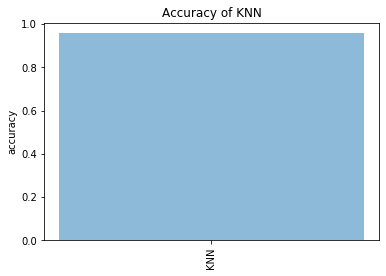

In [12]:
CompareAll = dict()
accuracies = run_all_and_Plot(df3)

CompareAll['Baseline'] = accuracies
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
plot_bar(accuracies)


In [16]:
redStats

,Referee,no_of_rounds,R_current_lose_streak,R_current_win_streak,R_draw,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_GROUND_att,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,R_age,Gender
0,Marc Goddard,5,0.0,4.0,0.0,17.000000,11.000000,75.000000,26.500000,9.400000,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,32.0,1
2,Dan Miragliotta,3,0.0,11.0,0.0,2.866667,1.733333,116.133333,49.466667,5.333333,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,35.0,1
3,Kevin MacDonald,3,1.0,0.0,0.0,5.875000,4.125000,104.875000,41.000000,1.000000,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,29.0,1
4,Dan Miragliotta,3,1.0,0.0,0.0,11.000000,7.250000,50.750000,24.750000,0.500000,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,26.0,1
6,Marc Goddard,3,0.0,3.0,0.0,14.000000,11.083333,72.583333,29.416667,16.083333,...,1.0,3.0,0.0,9.0,Orthodox,170.18,180.34,135.0,29.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2073,Marc Goddard,3,0.0,2.0,0.0,15.250000,10.000000,44.000000,16.500000,7.000000,...,0.0,0.0,0.0,2.0,Orthodox,167.64,165.10,135.0,28.0,0
2266,Fernando Yamasaki,3,0.0,2.0,0.0,21.666667,13.666667,148.666667,79.333333,2.000000,...,0.0,0.0,0.0,2.0,Orthodox,154.94,157.48,115.0,22.0,0
2352,Liam Kerrigan,3,0.0,0.0,0.0,6.500000,4.300000,45.416667,15.750000,7.500000,...,0.0,0.0,0.0,0.0,Orthodox,162.56,160.02,115.0,25.0,0
2798,Herb Dean,3,0.0,0.0,0.0,6.500000,4.300000,45.416667,15.750000,7.500000,...,0.0,0.0,0.0,0.0,Orthodox,172.72,175.26,145.0,25.0,0


In [14]:
#For the red corner

In [17]:
df3 = redStats


def Nearest(X_train,Y_train,X_test,Y_test,Models):
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    Models['KNN'] = [accuracy_score(Y_test,Y_pred),confusion_matrix(Y_test,Y_pred)]
   
    
def run_all_and_Plot(df3):
    Models = dict()
    from sklearn.model_selection import train_test_split
    X_all = np.asarray(df3[['R_avg_TD_pct', 'R_avg_KD', 'R_wins', 'R_avg_CLINCH_landed', 'R_avg_DISTANCE_landed', 'R_avg_opp_CLINCH_landed']])
    y_all = np.asarray(df3['Gender'])
    X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)
    Nearest(X_train,Y_train,X_test,Y_test,Models)
    return Models
run_all_and_Plot(df3)

{'KNN': [0.9369369369369369,
  array([[  3,  18],
         [  3, 309]])]}

In [18]:
def plot_bar(dict):
    labels = tuple(dict.keys())
    y_pos = np.arange(len(labels))
    values = [dict[n][0] for n in dict]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, labels,rotation='vertical')
    plt.ylabel('accuracy')
    plt.title('Accuracy of KNN')
    plt.show()

    

KNN 0.9369369369369369


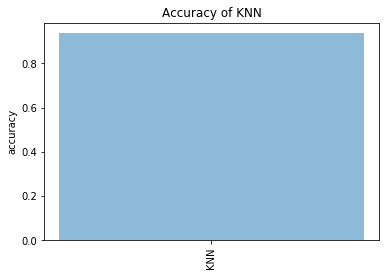

In [19]:
CompareAll = dict()
accuracies = run_all_and_Plot(df3)

CompareAll['Baseline'] = accuracies
for key,val in accuracies.items():
    print(str(key) +' '+ str(val[0]))
plot_bar(accuracies)
